[[0.    0.5   0.25  0.25 ]
 [0.667 0.    0.333 0.   ]
 [0.333 0.333 0.    0.333]
 [0.5   0.    0.5   0.   ]]


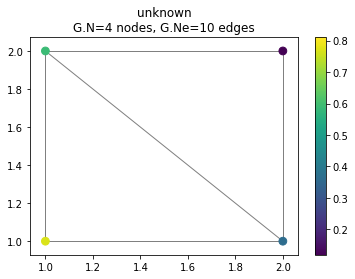

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import *

Adj=np.zeros((4,4))

Adj[0][1]=0.5
Adj[0][2]=0.25
Adj[0][3]=0.25
Adj[1][0]=0.667
Adj[1][2]=0.333
Adj[2][0]=0.333
Adj[2][1]=0.333
Adj[2][3]=0.333
Adj[3][0]=0.5
Adj[3][2]=0.5

Coord1=np.zeros((4,2))
Coord1[0][0]=1
Coord1[0][1]=2
Coord1[1][0]=1
Coord1[1][1]=1
Coord1[2][0]=2
Coord1[2][1]=1
Coord1[3][0]=2
Coord1[3][1]=2

x = np.zeros((1,4))

x[0][0] = 0.5914
x[0][1] = 0.7717
x[0][2] = 0.3642
x[0][3] = 0.1135

G = graphs.Graph(Adj)
G.set_coordinates(Coord1)
plotting.plot_signal(G, x, vertex_size = 60)

print(Adj)

[ 0.99975002 -0.72417637 -0.33320439  0.05763074] 

 [[-0.50012261 -0.49992415 -0.45154552 -0.18259481]
 [-0.50011309  0.59767018  0.15074485 -0.54340184]
 [-0.49971859 -0.29840604  0.75360967  0.27169395]
 [-0.5000456   0.55119873 -0.45327155  0.77301745]]


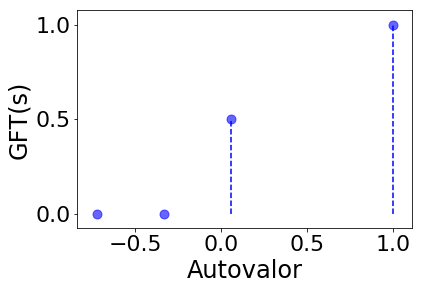

In [87]:
from gspy import *

fsize = 24 # plot axis font size
msize = 14 # marker size
csize = fsize - 2 # colorbar label size
graph_node_size = 80

eigvals,V = np.linalg.eig(Adj)

Vinv = np.linalg.inv(V)

eigval_abs_max = np.max(np.abs(eigvals))

index_eig_sort = np.argsort(np.abs(eigvals - eigval_abs_max))

ss = np.dot(Vinv,x.transpose()) #GFT

# A GFT é plotada
plt.figure()

stem(eigvals[index_eig_sort],np.abs(ss[index_eig_sort]),fsize=18,msize=8,color='b',linestyle='--',labelstr=0,alph=0.6)

plt.xlabel('Autovalor',fontsize=fsize)
plt.ylabel('GFT(s)',fontsize=fsize)
plt.tick_params(labelsize=fsize-2)
plt.axis('tight')

print(eigvals,"\n\n",V)

In [91]:
V2 = V[:, :][:, [0,3]]

sM = np.zeros((2,4)) 

sM[0][0] = 1
sM[1][1] = 1

C = np.dot(sM,V2)
C = np.linalg.inv(C)

R = np.dot(V2,C)

print(R)

[[ 1.00000000e+00  4.88131060e-17]
 [ 4.02532184e-17  1.00000000e+00]
 [ 2.25783785e+00 -1.25866966e+00]
 [ 3.64823320e+00 -2.64843761e+00]]


In [92]:
xM = np.dot(sM,x.transpose()) 

x_n = np.dot(R,xM)
print(x_n)

[[0.5914    ]
 [0.7717    ]
 [0.36396993]
 [0.11376581]]
